In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
tf.enable_eager_execution()
from tensorflow import keras 
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from dateutil import parser
from datetime import datetime

In [2]:
train = pd.read_csv('../data/weather1_education_train.csv')
train['timestamp'] = train['timestamp'].apply(parser.parse)
train.head()

,Unnamed: 0,area,building_name,electricity,primary_space_usage,timestamp,TemperatureC,month,year,date,...,hour_23,wkday_0,wkday_1,wkday_2,wkday_3,wkday_4,wkday_5,wkday_6,PSU_PrimClass,PSU_UnivClass
0,0,2777.0,PrimClass_Jacqueline,5.0,PrimClass,2014-12-01 00:00:00,7.0,12,2014,1,...,0,1,0,0,0,0,0,0,1,0
1,1,2777.0,PrimClass_Jacqueline,5.2,PrimClass,2014-12-01 01:00:00,5.0,12,2014,1,...,0,1,0,0,0,0,0,0,1,0
2,2,2777.0,PrimClass_Jacqueline,5.2,PrimClass,2014-12-01 02:00:00,5.0,12,2014,1,...,0,1,0,0,0,0,0,0,1,0
3,3,2777.0,PrimClass_Jacqueline,5.5,PrimClass,2014-12-01 03:00:00,6.0,12,2014,1,...,0,1,0,0,0,0,0,0,1,0
4,4,2777.0,PrimClass_Jacqueline,6.0,PrimClass,2014-12-01 04:00:00,7.0,12,2014,1,...,0,1,0,0,0,0,0,0,1,0


In [3]:
test = pd.read_csv('../data/weather1_education_test.csv')
test['timestamp'] = test['timestamp'].apply(parser.parse)

In [4]:
three_month = 2159 #from 12/01 0:00 to 1/31 23:00
pred_len = 6598 #length of prediction, 8757 is the length of 1 year-long observation

In [5]:
#nine_month = 6574 #from 12/01 0:00 to 8/31 23:00
#pred_len = 8757 - three_month #length of prediction, 8757 is the length of 1 year-long observation

In [99]:
def build_model_1(train_len, pred_len):
    inputs = layers.Input(shape=(1, three_month)) #temporal data: electricity
    #x = layers.LSTM(units=256, input_shape=(three_month, 1), activation='relu')(inputs)
    #x = layers.Dense(pred_len, activation='relu')(x)
    x = layers.LSTM(units=pred_len, input_shape=(three_month, 1), activation='relu')(inputs)
    model = keras.models.Model(inputs=inputs, outputs=x)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse']) 
    return model

In [100]:
def make_input_1(df, date, num_buildings):
    '''
    split input dataframe into fitting set and evaluation set by the input date
    '''
    X = np.array(df[df['timestamp'] <= date][['electricity']])
    Y = np.array(df[df['timestamp'] > date][['electricity']])
    len_obs = int(len(X) / num_buildings)
    len_pred = int(len(Y) / num_buildings)
    X = np.reshape(X, (num_buildings, 1, len_obs))
    Y = np.reshape(Y, (num_buildings, len_pred))
    return X, Y

In [101]:
def build_model_2(train_len, pred_len):
    inputs = layers.Input(shape=(1, three_month)) #temporal data: electricity
    x = layers.LSTM(units=256, input_shape=(three_month, 1), activation='relu')(inputs)
    x = layers.Dense(pred_len, activation='relu')(x)
    model = keras.models.Model(inputs=inputs, outputs=x)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse']) 
    return model

In [102]:
def make_input_2(df, date, num_buildings):
    '''
    split input dataframe into fitting set and evaluation set by the input date
    '''
    X = np.array(df[df['timestamp'] <= date][['electricity']])
    Y = np.array(df[df['timestamp'] > date][['electricity']])
    len_obs = int(len(X) / num_buildings)
    len_pred = int(len(Y) / num_buildings)
    X = np.reshape(X, (num_buildings, 1, len_obs))
    Y = np.reshape(Y, (num_buildings, len_pred))
    return X, Y

In [103]:
def build_model_3(train_len, pred_len):
    inputs = layers.Input(shape=(2, three_month)) #temporal data: electricity
    x = layers.LSTM(units=256, input_shape=(three_month, 2), activation='relu')(inputs)
    x = layers.Dense(pred_len, activation='relu')(x)
    model = keras.models.Model(inputs=inputs, outputs=x)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse']) 
    return model

In [104]:
def make_input_3(df, date, num_buildings):
    '''
    split input dataframe into fitting set and evaluation set by the input date
    '''
    X = np.array(df[df['timestamp'] <= date][['electricity', 'TemperatureC']])
    Y = np.array(df[df['timestamp'] > date][['electricity']])
    len_obs = int(len(X) / num_buildings)
    len_pred = int(len(Y) / num_buildings)
    X = np.reshape(X, (num_buildings, 2, len_obs))
    Y = np.reshape(Y, (num_buildings, len_pred))
    return X, Y

In [105]:
def build_model_4(train_len, pred_len):
    inputs = layers.Input(shape=(9, three_month)) #temporal data: electricity
    x = layers.LSTM(units=256, input_shape=(three_month, 9), activation='relu')(inputs)
    x = layers.Dense(pred_len, activation='relu')(x)
    model = keras.models.Model(inputs=inputs, outputs=x)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse']) 
    return model

In [106]:
def make_input_4(df, date, num_buildings):
    '''
    split input dataframe into fitting set and evaluation set by the input date
    '''
    X = np.array(df[df['timestamp'] <= date][['electricity', 'TemperatureC',
                                              'wkday_0', 'wkday_1', 'wkday_2', 'wkday_3', 'wkday_4', 'wkday_5', 'wkday_6']])
    Y = np.array(df[df['timestamp'] > date][['electricity']])
    len_obs = int(len(X) / num_buildings)
    len_pred = int(len(Y) / num_buildings)
    X = np.reshape(X, (num_buildings, 9, len_obs))
    Y = np.reshape(Y, (num_buildings, len_pred))
    return X, Y

In [107]:
def build_model_5(train_len, pred_len):
    inputs = layers.Input(shape=(21, three_month)) #temporal data: electricity
    x = layers.LSTM(units=256, input_shape=(three_month, 21), activation='relu')(inputs)
    x = layers.Dense(pred_len, activation='relu')(x)
    model = keras.models.Model(inputs=inputs, outputs=x)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse']) 
    return model

In [108]:
def make_input_5(df, date, num_buildings):
    '''
    split input dataframe into fitting set and evaluation set by the input date
    '''
    X = np.array(df[df['timestamp'] <= date][['electricity', 'TemperatureC',
                                              'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
                                              'wkday_0', 'wkday_1', 'wkday_2', 'wkday_3', 'wkday_4', 'wkday_5', 'wkday_6']])
    Y = np.array(df[df['timestamp'] > date][['electricity']])
    len_obs = int(len(X) / num_buildings)
    len_pred = int(len(Y) / num_buildings)
    X = np.reshape(X, (num_buildings, 21, len_obs))
    Y = np.reshape(Y, (num_buildings, len_pred))
    return X, Y

In [109]:
# def build_model_x(train_len, pred_len):
#     temp_inputs = layers.Input(shape=(2, three_month)) #electricity and temperature
#     categorical_inputs = layers.Input(shape=(1,)) #primary space usage
#     x = layers.LSTM(units=256, input_shape=(three_month, 2), activation='relu')(temp_inputs)
#     z = layers.Concatenate(axis=-1)([x, categorical_inputs])
#     z = layers.Dense(pred_len, activation='relu')(z)
#     model = keras.models.Model(inputs=[temp_inputs, categorical_inputs], outputs=z)
#     model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse']) 
#     return model

In [116]:
model = build_model_5(three_month, pred_len)
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 21, 2159)]        0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 256)               2473984   
_________________________________________________________________
dense_10 (Dense)             (None, 6598)              1695686   
Total params: 4,169,670
Trainable params: 4,169,670
Non-trainable params: 0
_________________________________________________________________


In [117]:
end = datetime(2015, 2, 28, 23)
#X_train, X_train_PSU, Y_train = make_input_3(train, end, 50)
#X_test, X_test_PSU, Y_test = make_input_3(test, end, 19)
X_train, Y_train = make_input_5(train, end, 50)
X_test, Y_test = make_input_5(test, end, 19)

In [118]:
#model.fit([X_train, X_train_PSU], Y_train, epochs=1000, batch_size=10)
model.fit(X_train, Y_train, epochs=10, batch_size=10)

Epoch 1/10
50/50 [==============================] - 3s 50ms/sample - loss: 1269.2647 - mean_absolute_error: 18.9294 - mean_squared_error: 1269.2649
Epoch 2/10
50/50 [==============================] - 2s 36ms/sample - loss: 711.8643 - mean_absolute_error: 15.0608 - mean_squared_error: 711.8644
Epoch 3/10
50/50 [==============================] - 2s 41ms/sample - loss: 344.8200 - mean_absolute_error: 11.3080 - mean_squared_error: 344.8200
Epoch 4/10
50/50 [==============================] - 2s 38ms/sample - loss: 271.1389 - mean_absolute_error: 10.4019 - mean_squared_error: 271.1389
Epoch 5/10
50/50 [==============================] - 2s 36ms/sample - loss: 313.1773 - mean_absolute_error: 11.3836 - mean_squared_error: 313.1772
Epoch 6/10
50/50 [==============================] - 2s 41ms/sample - loss: 278.7450 - mean_absolute_error: 10.4658 - mean_squared_error: 278.7450
Epoch 7/10
50/50 [==============================] - 2s 42ms/sample - loss: 283.2386 - mean_absolute_error: 10.4299 - mean_

In [80]:
Y_fitted = model.predict(X_train)

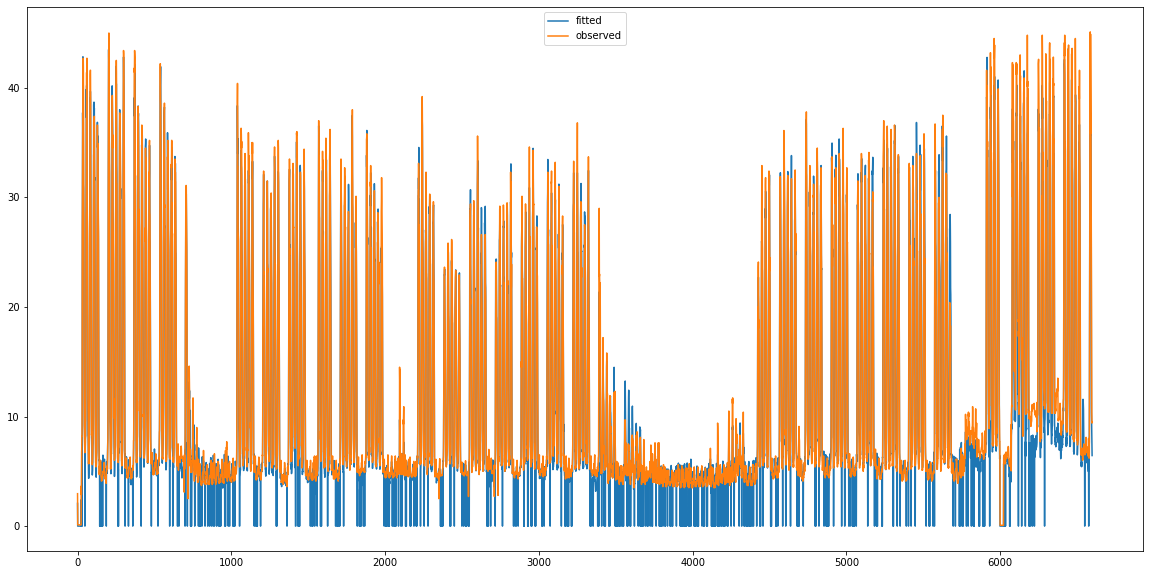

In [81]:
plt.figure(figsize=(20,10))
plt.plot(Y_fitted[0], label='fitted')
plt.plot(Y_train[0], label='observed')
plt.legend();

In [82]:
#model.evaluate([X_test, X_test_PSU], Y_test)
model.evaluate(X_test, Y_test)

19/19 [==============================] - 0s 21ms/sample - loss: 46.4876 - mean_absolute_error: 3.2253 - mean_squared_error: 46.4876


[46.4875602722168, 3.2252913, 46.48756]

In [83]:
Y_pred = model.predict(X_test)

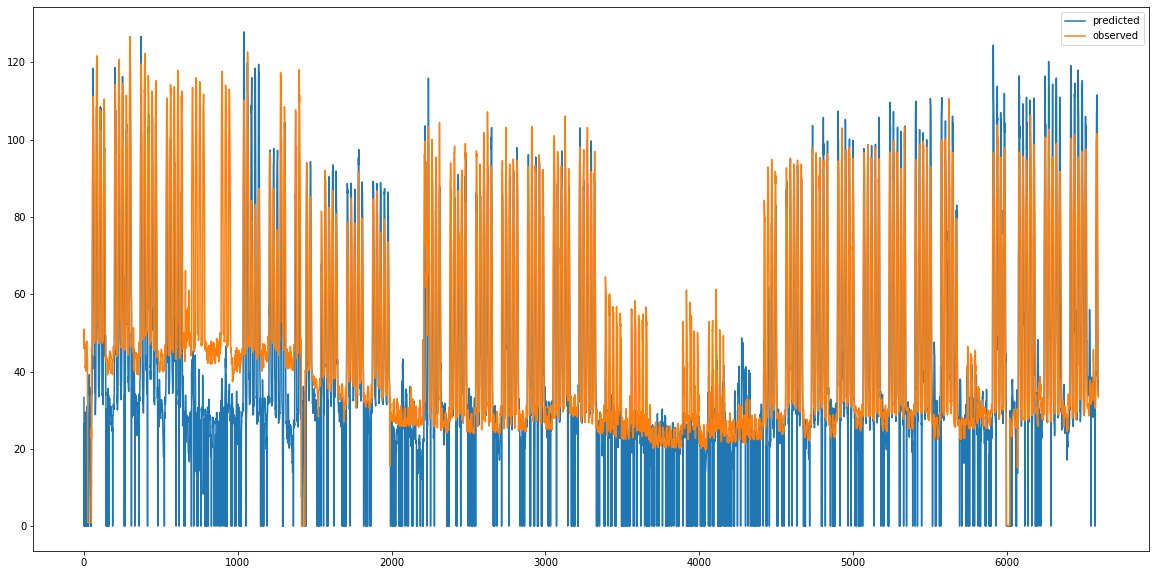

In [84]:
plt.figure(figsize=(20,10))
plt.plot(Y_pred[0], label='predicted')
plt.plot(Y_test[0], label='observed')
plt.legend();